## Final Project : Term Deposit Subscription Prediction

In this notebook:

1. We will first explore the dataset provided
2. We will create models to predict whether a client will subscribe to a term deposit. 
3. We will also make predictions for the clients in the test set which we can submit in the solution_checker.xlsx file to generate accuracy score. 

Let's start by importing the libraries that we will be using.

In [85]:
# importing libraries
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
import pydotplus
from IPython.display import Image      # For genrating an image of the tree
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [86]:
# loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Let's check the features present in our data and then we will look at their data types.

In [87]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [88]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

It can be infered that **subscribed** is the target variable as it is not present in the test dataset. Let's look at the shape of the dataset.

In [89]:
train.shape, test.shape

((31647, 18), (13564, 17))

We have 17 independent variables and 1 target variable, i.e. subscribed in the train dataset. We have similar features in the test dataset as the train dataset except the subscribed. We will predict the subscribed with the help of model built using the train data.

Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [90]:
# Print data types for each variable
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see there are two format of data types:

1. **object**: Object format means variables are categorical. Categorical variables in our dataset are: job, marital, education, default, housing, loan, contact, month, poutcome, subscribed

2. **int64**: It represents the integer variables. Integer variables in our dataset are: ID, age, balance, day, duration, campaign, pdays, previous

In [91]:
#printing first five rows of the dataset
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


## Univariate Analysis

Now Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [92]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [93]:
# Normalize can be set to True to print proportions instead of number 
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

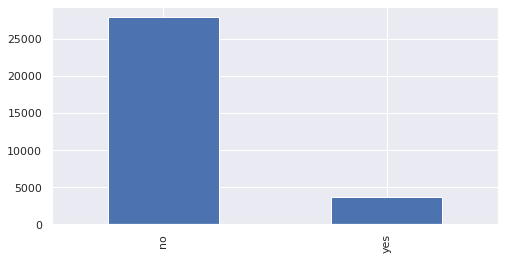

In [94]:
# plotting the bar plot of frequencies
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
train['subscribed'].value_counts().plot.bar()

So, 3715 users out of total 31647 have subscribed which is around 12%. Let's now explore the variables to have a better understanding of the dataset. We will first explore the variables individually using univariate analysis, then we will look at the relation between various independent variables and the target variable. We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look  at the distribution of age variable to see how many people belongs to a particular age group.

(array([ 923., 8271., 8994., 5577., 5001., 2307.,  268.,  216.,   81.,
           9.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

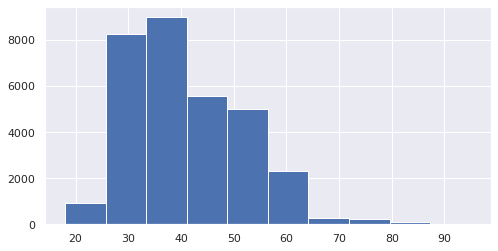

In [95]:
# plotting the age values 
plt.hist(train['age'])

We can infer that most of the clients fall in the age group between 20-60. Now let's look at what are the different types of jobs of the clients. As job is a categorical variable, we will look at its frequency table

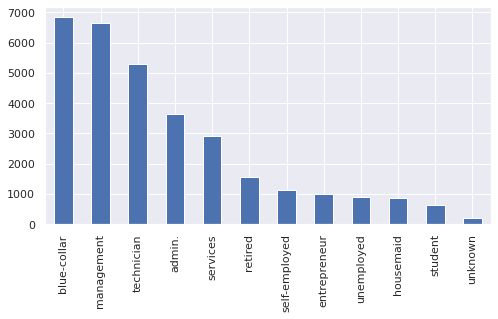

In [96]:
train['job'].value_counts().plot.bar()

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit. Let's also look at how many clients have default history.

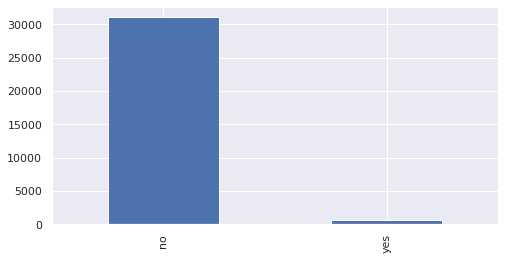

In [97]:
train['default'].value_counts().plot.bar()

More than 90% of the clients have no default history. Now we will explore these variables against the target variable using bivariate analysis. We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variables. Let's start with job and subscribed variable.

## Bivariate Analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

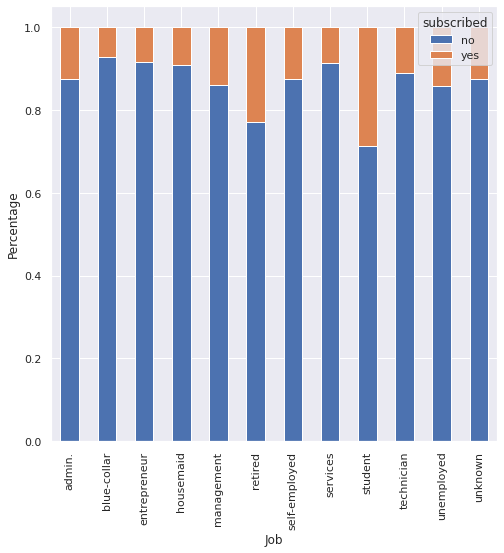

In [98]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

Next, let's explore the default variable against the subscribed variable.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

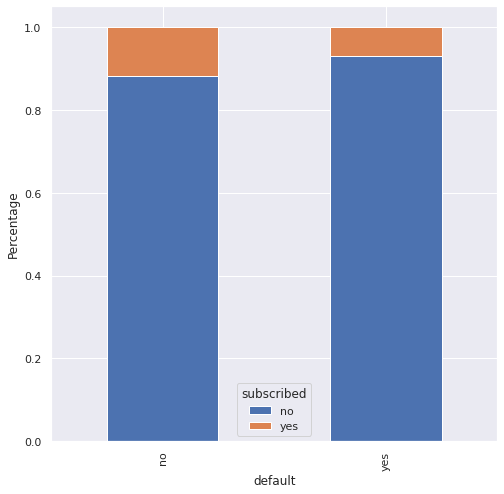

In [99]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Let's now look at how correlated our numerical variables are. We will see the correlation between each of these variables and the variable which have high negative or positive values are correlated. By this we can get an overview of the variables which might affect our target variable. We will convert our target variable into numeric values first.

In [100]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

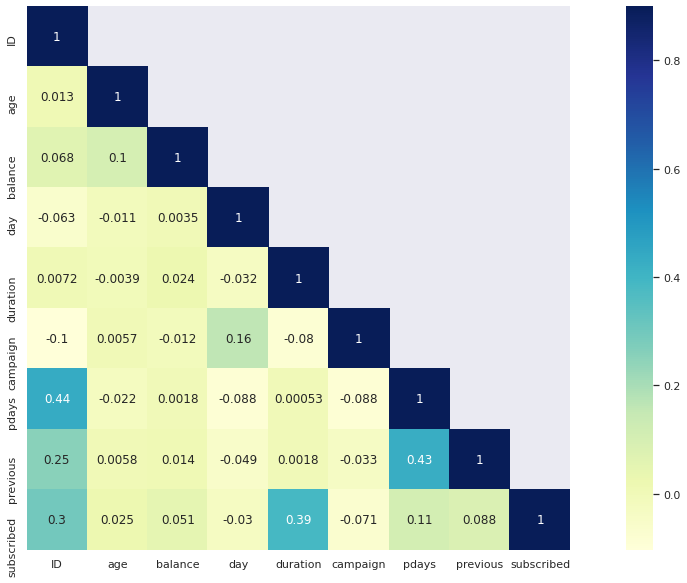

In [101]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can infer that duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

Next we will look for any missing values in the dataset.

In [102]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the train dataset. 

Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

## Model Building

In [103]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [104]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set. 

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. Logistic regression is used for classification problems and as it is a classification problem let's first build a Logistic Regression model.

## Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# defining the logistic regression model
lreg = LogisticRegression()

In [109]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8913112164296998

We got an accuracy score of around 90% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity. 

Let's try decision tree algorithm now to check if we get better accuracy with that. 

## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [115]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

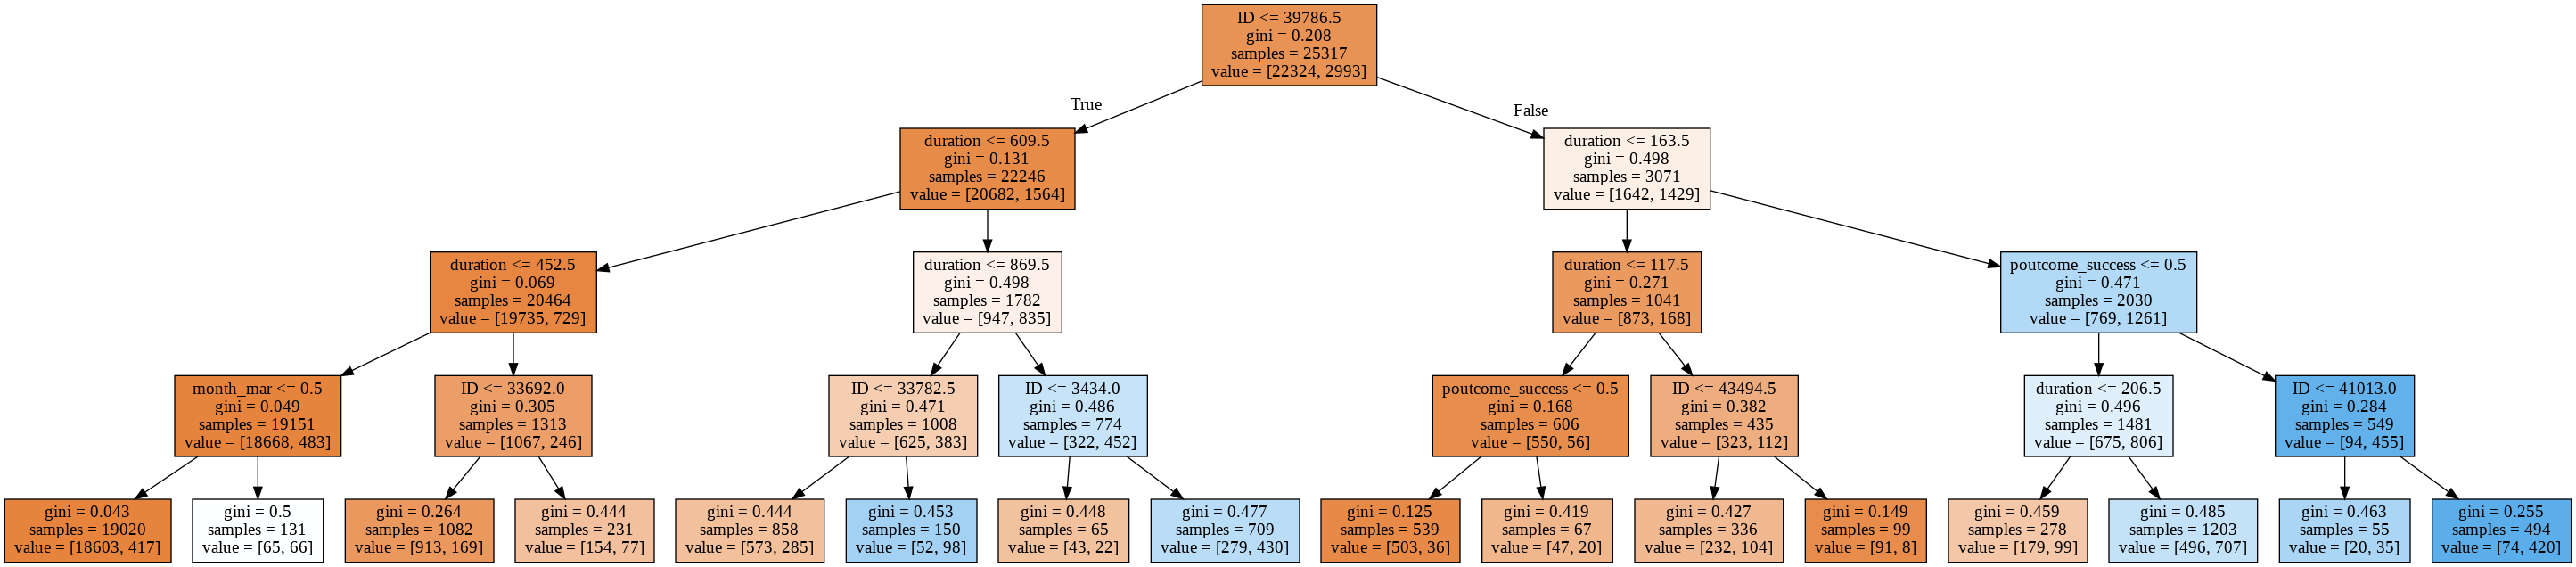

In [116]:
# Visualing the Decision Tree 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf,out_file=None, feature_names=X_train.columns,filled=True)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [117]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [118]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.9042654028436019

We got an accuracy of more than 90% on the validation set. We can try to improve the score by tuning hyperparameters of the model. 

# Random Forest Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier


In [120]:
# Defining the random forest Model
rmodel = RandomForestClassifier(n_estimators=10)

In [121]:
# Fitting the required random forest model
rmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
# Printing the train and test accuracy
print(rmodel.score(X_train,y_train))
print(rmodel.score(X_val,y_val))

0.9930481494647865
0.9011058451816746


We see that we have got an accuracy of around 99% on the training dataset which states that the model would
behave as an overfit model in case of the training data. But on the testing data we get the accuracy of about
90% which is similar to the accuracy got in the decision tree classifier. From the above observations we can 
conclude that decision tree would be a better model in the prediction of the people who will subscribe to the 
term deposit.

# K-Neighbours Classifier

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
#Defining the KNN model
kmodel = KNeighborsClassifier(n_neighbors = 6)

In [125]:
# Making the model fit
kmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [126]:
# predicting the values in the train dataset
Yptr = kmodel.predict(X_train)

In [127]:
# predicting for the values in the test dataset
Yptt = kmodel.predict(X_val)

In [128]:
# Calculating the accuracy of the model in the train dataset
((Yptr == y_train).sum())/len(X_train)

0.9182762570604732

In [129]:
# Calculating the accuracy of the model for the test dataset
((Yptt == y_val).sum())/len(X_val)

0.8930489731437599

In [130]:
# Checking For the Optimal no of the neighbors
tr_acc = []
ts_acc = []
for i in range(1,20):
    kmodel = KNeighborsClassifier(n_neighbors = i)
    kmodel.fit(X_train,y_train)
    ytrain_P = kmodel.predict(X_train)
    ytest_P = kmodel.predict(X_val)
    tr_acc.append(((ytrain_P == y_train).sum())/len(X_train))
    ts_acc.append(((ytest_P == y_val).sum())/len(X_val))
    


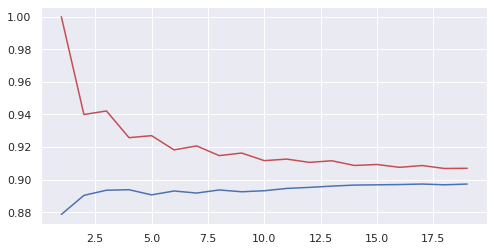

In [131]:
# Plotting for the accuracy at different no of neighbors
plt.plot(range(1,20),tr_acc,c='r')
plt.plot(range(1,20),ts_acc,c='b')

From the above graph we can interpret that the distance between the test accuracy and train accuracy keeps 
on decreasing as we move from lower number of neighbors to higher number of neighbors but the test accuracy
almost remains constant on the test dataset. Besides that implementing higher number of neighbors require more 
computational power. So from this we can infer that although test accuracy almost remains constant, the train
accuracy decreses and optimal no of neighbors can be taken as 6.

# Neural Network 

In [132]:
import tensorflow as tf

In [133]:
# Defining the model
model = tf.keras.models.Sequential()


In [134]:
# Adding the layers in the model

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(3, activation='relu'))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [135]:
#Compiling the model
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [136]:
# Train your model
model.fit(np.array(X_train),np.array(y_train),epochs=10)

Epoch 1/10
792/792 [==============================] - 1s 1ms/step - loss: 7.2596 - accuracy: 0.8807
Epoch 2/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3642 - accuracy: 0.8818
Epoch 3/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 4/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 5/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 6/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 7/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 8/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 9/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818
Epoch 10/10
792/792 [==============================] - 1s 1ms/step - loss: 0.3634 - accuracy: 0.8818

In [137]:
# Evaluate the model
model.evaluate(np.array(X_val),np.array(y_val))

198/198 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8859


[0.35502925515174866, 0.8859399557113647]

From the above neural network we got the accuracy of maximum about 88% in the training dataset and about 88.5% in the testing dataset. Even if the no of hidden layers is increased still the accuracy of the model defined does not increases and it comes to a stable accuracy.


In [138]:
# Creating a dictionary for the all the test accuracies
acc = {}
acc['Logistic_Reg'] = 0.8928909952606635
acc['Decision_tree'] = 0.9042654028436019
acc['Random_Forest'] = 0.9011058451816746
acc['KNN'] = 0.8930489731437599
acc['Neural Network'] = 0.8859
Algorithms = acc.keys()
Accuracy = acc.values()

Text(0, 0.5, 'Test Accuracy')

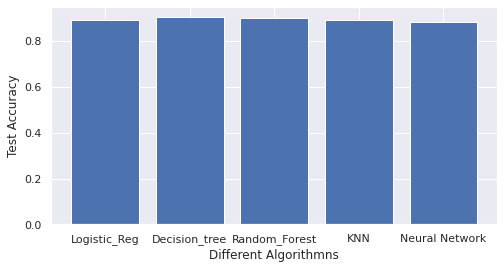

In [139]:
# Plotting different algorithms against their respective accuracy
plt.bar(Algorithms,Accuracy)
plt.xlabel('Different Algorithmns')
plt.ylabel('Test Accuracy')

From the various algorithms that we have considered we can infer that Decison Tree has the highest accuracy
on the both training and testing data. So our predicted values will be calculated through that model.

Lets generate the test dummies and the predictions.

In [140]:
test = pd.get_dummies(test)

In [141]:
test_prediction = clf.predict(test)

Finally, we will save these predictions into a csv file. We can then open this csv file and copy paste the predictions on the provided excel file to generate score.

In [142]:
submission = pd.DataFrame()

In [143]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

In [144]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [145]:
submission.to_csv('submission.csv', header=True, index=False)

Following these steps we can generate our score:
1. Open the submission.csv file.
2. Copy the values in the subscribed column and paste them in the subscribed column of solution_checker.xlsx file.
3. We will see the accuracy of the model on test dataset under Your accuracy score column.